## ***Análise do Sistema Metroviário DE São Paulo***


## **Resumo**

<div style="text-align: justify;">
Este projeto tem como objetivo analisar o sistema metroviário de São Paulo, considerando o sistema de metro e trens, as informações foram retiradas do portal de transparencia das empresas Metro, CPTM, ViaQuatro e Linha Mobilidade,
O grafo consiste das estações de 5 linhas do metrô de São Paulo (Azul, Verde, Vermelha, Amarela, Lilás e Prata) e 7 linhas de trem (Rubi, Diamante, Esmeralda, Turquesa, Coral, Safira e Jade), onde cada estação será um representada por um vértice e as conexões entre estações representadas por arestas com pesos dado pela diferença de passageiros entre as duas estações.
</div>

### **Coleta e preparação dos dados**

<div style="text-align: justify;">
Os dados do projeto foram coletados através do site e portais de transparencia do Metro de SP (https://transparencia.metrosp.com.br/dataset/demanda/resource/e69866e9-6c7a-424f-ad4d-816c6b96b1c4) CPTM, Via Mobilidade e ViaQuatro. Após a criação do grafo base, adicionamos ao grafo as estações de cada linha sequencialmente, tomando cuidado para não acrescentar a mesma estação duas vezes caso ela esteja presente em mais de uma linha. Em seguida, inserimos as arestas analisando as conexões das estações em cada linha, colocando como peso das arestas a distância em quilômetros entre estações vizinhas.
</div>




## **Modelagem**


<div style="text-align: justify;">
O grafo foi modelado da seguinte forma: cada estação do metrô de São Paulo foi representada por um vértice e as conexões, entre cada par de estações, foram representadas por arestas, o sistema de ponderação das arestas é explica na sequência.
<div>

**Importando bibliotecas necessárias**

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Estatistica para cálculos dos pesos das arestas

O peso das arestas foi baseado na demanda por passageiros de cada estação. Os dados foram coletados de (1, 2, 3) sendo todos colocados como a média diaria por milhares de passageiros. O peso entre aresta A e B é a diferença da demanda entre as duas estações.

In [2]:
linha_azul = pd.read_csv('Dados/Metro/Linha_Azul.csv', sep=';')
linha_verde = pd.read_csv('Dados/Metro/Linha_Verde.csv', sep=';')
linha_vermelha = pd.read_csv('Dados/Metro/Linha_Vermelha.csv', sep=';')
linha_amarela = pd.read_csv('Dados/Metro/Linha_Amarela.csv', sep=';')
linha_lilas = pd.read_csv('Dados/Metro/Linha_Lilas.csv', sep=';')
linha_rubi = pd.read_csv('Dados/Metro/Linha_Rubi.csv', sep=';')
linha_diamante = pd.read_csv('Dados/Metro/Linha_Diamante.csv', sep=';')
linha_esmeralda = pd.read_csv('Dados/Metro/Linha_Esmeralda.csv', sep=';')
linha_turquesa = pd.read_csv('Dados/Metro/Linha_Turquesa.csv', sep=';')
linha_coral = pd.read_csv('Dados/Metro/Linha_Coral.csv', sep=';')
linha_safira = pd.read_csv('Dados/Metro/Linha_Safira.csv', sep=';')
linha_jade = pd.read_csv('Dados/Metro/Linha_Jade.csv', sep=';')
linha_prata = pd.read_csv('Dados/Metro/Linha_Prata.csv', sep=';')

In [3]:
linha_azul = linha_azul.drop(columns=['Jan', 'Fev', 'Mar',	'Abr', 'Mai', 'Jun', 'Jul',	'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_verde = linha_verde.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_vermelha = linha_vermelha.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',	'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_prata = linha_prata.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])


In [4]:
linha_rubi['Media'] = pd.to_numeric(linha_rubi['Media'], errors='coerce')
linha_rubi['Media'] = linha_rubi['Media']/31000

linha_turquesa['Media'] = pd.to_numeric(linha_turquesa['Media'], errors='coerce')
linha_turquesa['Media'] = linha_turquesa['Media']/31000

linha_coral['Media'] = pd.to_numeric(linha_coral['Media'], errors='coerce')
linha_coral['Media'] = linha_coral['Media']/31000

linha_safira['Media'] = pd.to_numeric(linha_safira['Media'], errors='coerce')
linha_safira['Media'] = linha_safira['Media']/31000

linha_jade['Media'] = pd.to_numeric(linha_jade['Media'], errors='coerce')
linha_jade['Media'] = linha_jade['Media']/31000

In [5]:
linha_azul['Difference'] = linha_azul['Media'].diff().abs()
linha_verde['Difference'] = linha_verde['Media'].diff().abs()
linha_vermelha['Difference'] = linha_vermelha['Media'].diff().abs()
linha_amarela['Difference'] = linha_amarela['Media'].diff().abs()
linha_lilas['Difference'] = linha_lilas['Media'].diff().abs()
linha_rubi['Difference'] = linha_rubi['Media'].diff().abs()
linha_diamante['Difference'] = linha_diamante['Media'].diff().abs()
linha_esmeralda['Difference'] = linha_esmeralda['Media'].diff().abs()
linha_turquesa['Difference'] = linha_turquesa['Media'].diff().abs()
linha_coral['Difference'] = linha_coral['Media'].diff().abs()
linha_safira['Difference'] = linha_safira['Media'].diff().abs()
linha_jade['Difference'] = linha_jade['Media'].diff().abs()
linha_prata['Difference'] = linha_prata['Media'].diff().abs()

**Criando o grafo G**

In [6]:
G = nx.Graph()

## **Adicionando vértices**

### Linha 1 Azul


In [7]:
G.add_nodes_from(["Jabaquara", "Conceição", "São Judas", "Saúde", "Praça da Árvore", "Santa Cruz", "Vila Mariana", "Ana Rosa", "Paraíso", "Vergueiro", "São Joaquim", "Liberdade", "Sé", "São Bento", "Luz", "Tiradentes", "Armênia", "Portuguesa-Tietê", "Carandiru", "Santana", "Jardim São Paulo-Ayrton Senna", "Parada Inglesa", "Tucuruvi"])

In [8]:
G.add_weighted_edges_from([("Jabaquara", "Conceição", 39.00), ("Conceição", "São Judas", 14), ("São Judas", "Saúde", 11), ("Saúde", "Praça da Árvore", 11), ("Praça da Árvore", "Santa Cruz", 78), ("Santa Cruz", "Vila Mariana", 73), ("Vila Mariana", "Ana Rosa", 57), ("Ana Rosa", "Paraíso", 19), ("Paraíso", "Vergueiro", 70), ("Vergueiro", "São Joaquim", 3), ("São Joaquim", "Liberdade", 8), ("Liberdade", "Sé", 148), ("Sé", "São Bento", 118), ("São Bento", "Luz", 78), ("Luz", "Tiradentes", 114), ("Tiradentes", "Armênia", 4), ("Armênia", "Portuguesa-Tietê", 25), ("Portuguesa-Tietê", "Carandiru", 33), ("Carandiru", "Santana", 37), ("Santana", "Jardim São Paulo-Ayrton Senna", 37), ("Jardim São Paulo-Ayrton Senna", "Parada Inglesa", 2), ("Parada Inglesa", "Tucuruvi", 42)])

### Linha 2 Verde


In [9]:
G.add_nodes_from(["Vila Madalena", "Santuário Nossa Senhora de Fátima-Sumaré", "Clínicas", "Consolação", "Trianon-Masp", "Brigadeiro", "Paraíso", "Ana Rosa", "Chácara Klabin", "Santos-Imigrantes", "Alto do Ipiranga", "Sacoma", "Tamanduateí", "Vila Prudente"],)

In [10]:
G.add_weighted_edges_from([("Vila Madalena", "Santuário Nossa Senhora de Fátima-Sumaré", 11), ("Santuário Nossa Senhora de Fátima-Sumaré", "Clínicas", 11), ("Clínicas", "Consolação", 76), ("Consolação", "Trianon-Masp", 51), ("Trianon-Masp", "Brigadeiro", 3), ("Brigadeiro", "Paraíso", 13), ("Paraíso", "Ana Rosa", 3), ("Ana Rosa", "Chácara Klabin", 23), ("Chácara Klabin", "Santos-Imigrantes", 67), ("Santos-Imigrantes", "Alto do Ipiranga", 3), ("Alto do Ipiranga", "Sacoma", 22), ("Sacoma", "Tamanduateí", 34), ("Tamanduateí", "Vila Prudente", 2)])

### Linha 3 Vermelha

In [11]:
G.add_nodes_from(["Palmeiras-Barra Funda", "Marechal Deodoro", "Santa Cecília", "República", "Anhangabaú", "Sé", "Pedro II", "Brás", "Bresser-Mooca", "Belém", "Tatuapé", "Carrão-Assaí Atacadista", "Penha", "Vila Matilde", "Guilhermina-Esperança", "Patriarca", "Artur Alvim", "Corinthians-Itaquera"])

In [12]:
G.add_weighted_edges_from([("Palmeiras-Barra Funda", "Marechal Deodoro", 109), ("Marechal Deodoro", "Santa Cecília", 3), ("Santa Cecília", "República", 96), ("República", "Anhangabaú", 68), ("Anhangabaú", "Sé", 149), ("Sé", "Pedro II", 184), ("Pedro II", "Brás", 56), ("Brás", "Bresser-Mooca", 41), ("Bresser-Mooca", "Belém", 6), ("Belém", "Tatuapé", 42), ("Tatuapé", "Carrão-Assaí Atacadista", 31), ("Carrão-Assaí Atacadista", "Penha", 20), ("Penha", "Vila Matilde", 1), ("Vila Matilde", "Guilhermina-Esperança", 5), ("Guilhermina-Esperança", "Patriarca", 1), ("Patriarca", "Artur Alvim", 33), ("Artur Alvim", "Corinthians-Itaquera", 18)])

### Linha 4 Amarela

In [13]:
G.add_nodes_from(["Luz", "República", "Higienópolis-Mackenzie", "Paulista", "Oscar Freire", "Fradique Coutinho", "Faria Lima", "Pinheiros", "Butantã", "São Paulo-Morumbi", "Vila Sônia"])

In [14]:
G.add_weighted_edges_from([("Luz", "República", 37), ("República", "Higienópolis-Mackenzie", 791), ("Higienópolis-Mackenzie", "Paulista", 83), ("Paulista", "Oscar Freire", 86), ("Oscar Freire", "Fradique Coutinho", 6), ("Fradique Coutinho", "Faria Lima", 18), ("Faria Lima", "Pinheiros", 73), ("Pinheiros", "Butantã", 69), ("Butantã", "São Paulo-Morumbi", 13), ("São Paulo-Morumbi", "Vila Sônia", 24)])

### Linha 5 Lilas

In [15]:
G.add_nodes_from(["Capão Redondo", "Campo Limpo", "Vila das Belezas", "Giovanni Gronchi", "Santo Amaro", "Largo Treze", "Adolfo Pinheiro", "Alto da Boa Vista", "Borba Gato", "Brooklin", "Campo Belo", "Eucaliptos", "Moema", "AACD-Servidor", "Hospital São Paulo", "Santa Cruz", "Chácara Klabin"])

In [16]:
G.add_weighted_edges_from([("Capão Redondo", "Campo Limpo", 58), ("Campo Limpo", "Vila das Belezas", 23), ("Vila das Belezas", "Giovanni Gronchi", 8), ("Giovanni Gronchi", "Santo Amaro", 70), ("Santo Amaro", "Largo Treze", 58), ("Largo Treze", "Adolfo Pinheiro", 23), ("Adolfo Pinheiro", "Alto da Boa Vista", 7), ("Alto da Boa Vista", "Borba Gato", 6), ("Borba Gato", "Brooklin", 6), ("Brooklin", "Campo Belo", 4), ("Campo Belo", "Eucaliptos", 5), ("Eucaliptos", "Moema", 2), ("Moema", "AACD-Servidor", 9), ("AACD-Servidor", "Hospital São Paulo", 1), ("Hospital São Paulo", "Santa Cruz", 54), ("Santa Cruz", "Chácara Klabin", 25)])

### Linha 7 Rubi

In [17]:
G.add_nodes_from(["Luz", "Palmeiras-Barra Funda", "Agua Branca", "Lapa", "Piqueri", "Pirituba", "Vila Clarice", "Jaraguá", "Vila Aurora", "Perus", "Caieiras", "Franco da Rocha", "Baltazar Fidélis", "Francisco Morato", "Botujuru", "Campo Limpo Paulista", "Várzea Paulista", "Jundiaí"])

In [18]:
G.add_weighted_edges_from([("Luz", "Palmeiras-Barra Funda", 71), ("Palmeiras-Barra Funda", "Agua Branca", 104), ("Agua Branca", "Lapa", 18), ("Lapa", "Piqueri", 7), ("Piqueri", "Pirituba", 6), ("Pirituba", "Vila Clarice", 10), ("Vila Clarice", "Jaraguá", 11), ("Jaraguá", "Vila Aurora", 6), ("Vila Aurora", "Perus", 10), ("Perus", "Caieiras", 8), ("Caieiras", "Franco da Rocha", 3), ("Franco da Rocha", "Baltazar Fidélis", 12), ("Baltazar Fidélis", "Francisco Morato", 13), ("Francisco Morato", "Botujuru", 36), ("Botujuru", "Campo Limpo Paulista", 1), ("Campo Limpo Paulista", "Várzea Paulista", 1), ("Várzea Paulista", "Jundiaí", 328)])

### Linha 8 Diamante

In [19]:
G.add_nodes_from(["Armador Bueno", "Santa Rita", "Itapevi", "Eng Cardoso", "Sangrado Coração", "Jandira", "Jardim Silveira", "Jardim Belval", "Barueri", "Antonio João", "Santa Terezinha", "Carapicuiba", "General Miguel Costa", "Quitauna", "Comandante Sampaio", "Osasco", "Presidente Altino", "Imperatriz Leopoldina", "Domingos Moraes", "Lapa", "Palmeiras Barra Funda", "Julio Prestes"])

In [20]:
G.add_weighted_edges_from([("Armador Bueno", "Santa Rita", 2), ("Santa Rita", "Itapevi", 2), ("Itapevi", "Eng Cardoso", 22), ("Eng Cardoso", "Sangrado Coração", 19), ("Sangrado Coração", "Jandira", 7), ("Jandira", "Jardim Silveira", 6), ("Jardim Silveira", "Jardim Belval", 3), ("Jardim Belval", "Barueri", 18), ("Barueri", "Antonio João", 8), ("Antonio João", "Santa Terezinha", 12), ("Santa Terezinha", "Carapicuiba", 23), ("Carapicuiba", "General Miguel Costa", 11), ("General Miguel Costa", "Quitauna", 9), ("Quitauna", "Comandante Sampaio", 4), ("Comandante Sampaio", "Osasco", 27), ("Osasco", "Presidente Altino", 29), ("Presidente Altino", "Imperatriz Leopoldina", 8), ("Imperatriz Leopoldina", "Domingos Moraes", 2), ("Domingos Moraes", "Lapa", 2), ("Lapa", "Palmeiras Barra Funda", 75), ("Palmeiras Barra Funda", "Julio Prestes", 91)])

### Linha 9 Esmeralda

In [41]:
G.add_nodes_from(["Osasco", "Presidente Altino", "Ceasa", "Villa Lobos–Jaguaré", "Cidade Universitária", "Pinheiros", "Hebraica–Rebouças", "Cidade Jardim", "Vila Olímpia", "Berrini", "Morumbi", "Granja Julieta", "João Dias", "Santo Amaro", "Socorro", "Jurubatuba", "Autódromo", "Primavera–Interlagos", "Grajaú", "Bruno Covas/Mendes–Vila Natal", "Varginha"])

In [ ]:
G.add_weighted_edges_from([("Osasco", "Presidente Altino", 13), ("Presidente Altino", "Ceasa", 2), ("Ceasa", "Villa Lobos–Jaguaré", 6), ("Villa Lobos–Jaguaré", "Cidade Universitária", 5), ("Cidade Universitária", "Pinheiros", 98), ("Pinheiros", "Hebraica–Rebouças", 96), ("Hebraica–Rebouças", "Cidade Jardim", 6), ("Cidade Jardim", "Vila Olímpia", 15), ("Vila Olímpia", "Berrini", 12), ("Berrini", "Morumbi", 4), ("Morumbi", "Granja Julieta", 10), ("Granja Julieta", "João Dias", 5), ("João Dias", "Santo Amaro", 79), ("Santo Amaro", "Socorro", 77), ("Socorro", "Jurubatuba", 4), ("Jurubatuba", "Autódromo", 4), ("Autódromo", "Primavera–Interlagos", 5), ("Primavera–Interlagos", "Grajaú", 30), ("Grajaú", "Bruno Covas/Mendes–Vila Natal", 13), ("Bruno Covas/Mendes–Vila Natal", "Varginha", 33)])

### Linha 10 Turquesa

In [43]:
G.add_nodes_from(["Luz", "Brás", "Juventude–Mooca", "Ipiranga", "Tamanduatei", "São Caetano", "Utinga", "Prefeito Saladino", "Santo André", "Capuava", "Mauá", "Guapituba", "Ribeirão Pires", "Rio Grande da Serra"])

In [ ]:
G.add_weighted_edges_from([("Luz", "Brás", 22), ("Brás", "Juventude–Mooca", 17), ("Juventude–Mooca", "Ipiranga", 1), ("Ipiranga", "Tamanduatei", 46), ("Tamanduatei", "São Caetano", 33), ("São Caetano", "Utinga", 16), ("Utinga", "Prefeito Saladino", 1), ("Prefeito Saladino", "Santo André", 37), ("Santo André", "Capuava", 38), ("Capuava", "Mauá", 1), ("Mauá", "Guapituba", 32), ("Guapituba", "Ribeirão Pires", 6), ("Ribeirão Pires", "Rio Grande da Serra", 5)])

### Linha 11 Coral

In [45]:
G.add_nodes_from(["Luz", "Brás", "Tatuapé", "Corinthians-Itaquera", "Dom Bosco", "José Bonifácio", "Guaianases", "Antonio Gianetti Neto", "Ferraz de Vasconcelos", "Poá", "Calmon Viana", "Suzano", "Jundiapeba", "Bras Cubas", "Mogi das Cruzes", "Estudantes"])

In [ ]:
G.add_weighted_edges_from([("Luz", "Brás", 22), ("Brás", "Tatuapé", 34), ("Tatuapé", "Corinthians-Itaquera", 31), ("Corinthians-Itaquera", "Dom Bosco", 20), ("Dom Bosco", "José Bonifácio", 1), ("José Bonifácio", "Guaianases", 594), ("Guaianases", "Antonio Gianetti Neto", 597), ("Antonio Gianetti Neto", "Ferraz de Vasconcelos", 10), ("Ferraz de Vasconcelos", "Poá", 11), ("Poá", "Calmon Viana", 5), ("Calmon Viana", "Suzano", 26), ("Suzano", "Jundiapeba", 25), ("Jundiapeba", "Bras Cubas", 1), ("Bras Cubas", "Mogi das Cruzes", 3), ("Mogi das Cruzes", "Estudantes", 3)])

### Linha 12 Safira

In [47]:
G.add_nodes_from(["Brás", "Tatuapé", "Engenheiro Goulart", "USP Leste", "Comendador Ermelino", "São Miguel Paulista", "Jardim Helena-Vila Mara", "Itaim Paulista", "Jardim Romano", "Engenheiro Manoel Feio", "Itaquaquecetuba", "Aracaré", "Calmon Viana"])

In [ ]:
G.add_weighted_edges_from([("Brás", "Tatuapé", 19), ("Tatuapé", "Engenheiro Goulart", 16), ("Engenheiro Goulart", "USP Leste", 1), ("USP Leste", "Comendador Ermelino", 2), ("Comendador Ermelino", "São Miguel Paulista", 7), ("São Miguel Paulista", "Jardim Helena-Vila Mara", 1), ("Jardim Helena-Vila Mara", "Itaim Paulista", 12), ("Itaim Paulista", "Jardim Romano", 10), ("Jardim Romano", "Engenheiro Manoel Feio", 8), ("Engenheiro Manoel Feio", "Itaquaquecetuba", 7), ("Itaquaquecetuba", "Aracaré", 10), ("Aracaré", "Calmon Viana", 4)])

### Linha 13 Jade

In [49]:
G.add_nodes_from(["Engenheiro Goulart", "Guarulhos–Cecap", "Aeroporto-Guarulhos"])

In [ ]:
G.add_weighted_edges_from([("Engenheiro Goulart", "Guarulhos–Cecap", 3), ("Guarulhos–Cecap", "Aeroporto-Guarulhos", 5)])

### Linha 15 Prata

In [51]:
G.add_nodes_from(["Vila Prudente", "Oratório", "São Lucas", "Camilo Haddad", "Vila Tolstói", "Vila União", "Jardim Planalto", "Sapopemba", "Fazenda da Juta", "São Mateus", "Jardim Colonial"])

In [ ]:
G.add_weighted_edges_from([("Vila Prudente", "Oratório", 51), ("Oratório", "São Lucas", 2), ("São Lucas", "Camilo Haddad", 1), ("Camilo Haddad", "Vila Tolstói", 1), ("Vila Tolstói", "Vila União", 1), ("Vila União", "Jardim Planalto", 4), ("Jardim Planalto", "Sapopemba", 1), ("Sapopemba", "Fazenda da Juta", 5), ("Fazenda da Juta", "São Mateus", 12), ("São Mateus", "Jardim Colonial", 6)])

#**Exportando grafo em formato gexf para utilização do Gephi**

In [ ]:
# convert the graph to Gephi
nx.write_gexf(G, '/content/drive/MyDrive/cars_test.gexf', version="1.2draft")

#**Imprimindo o grafo**

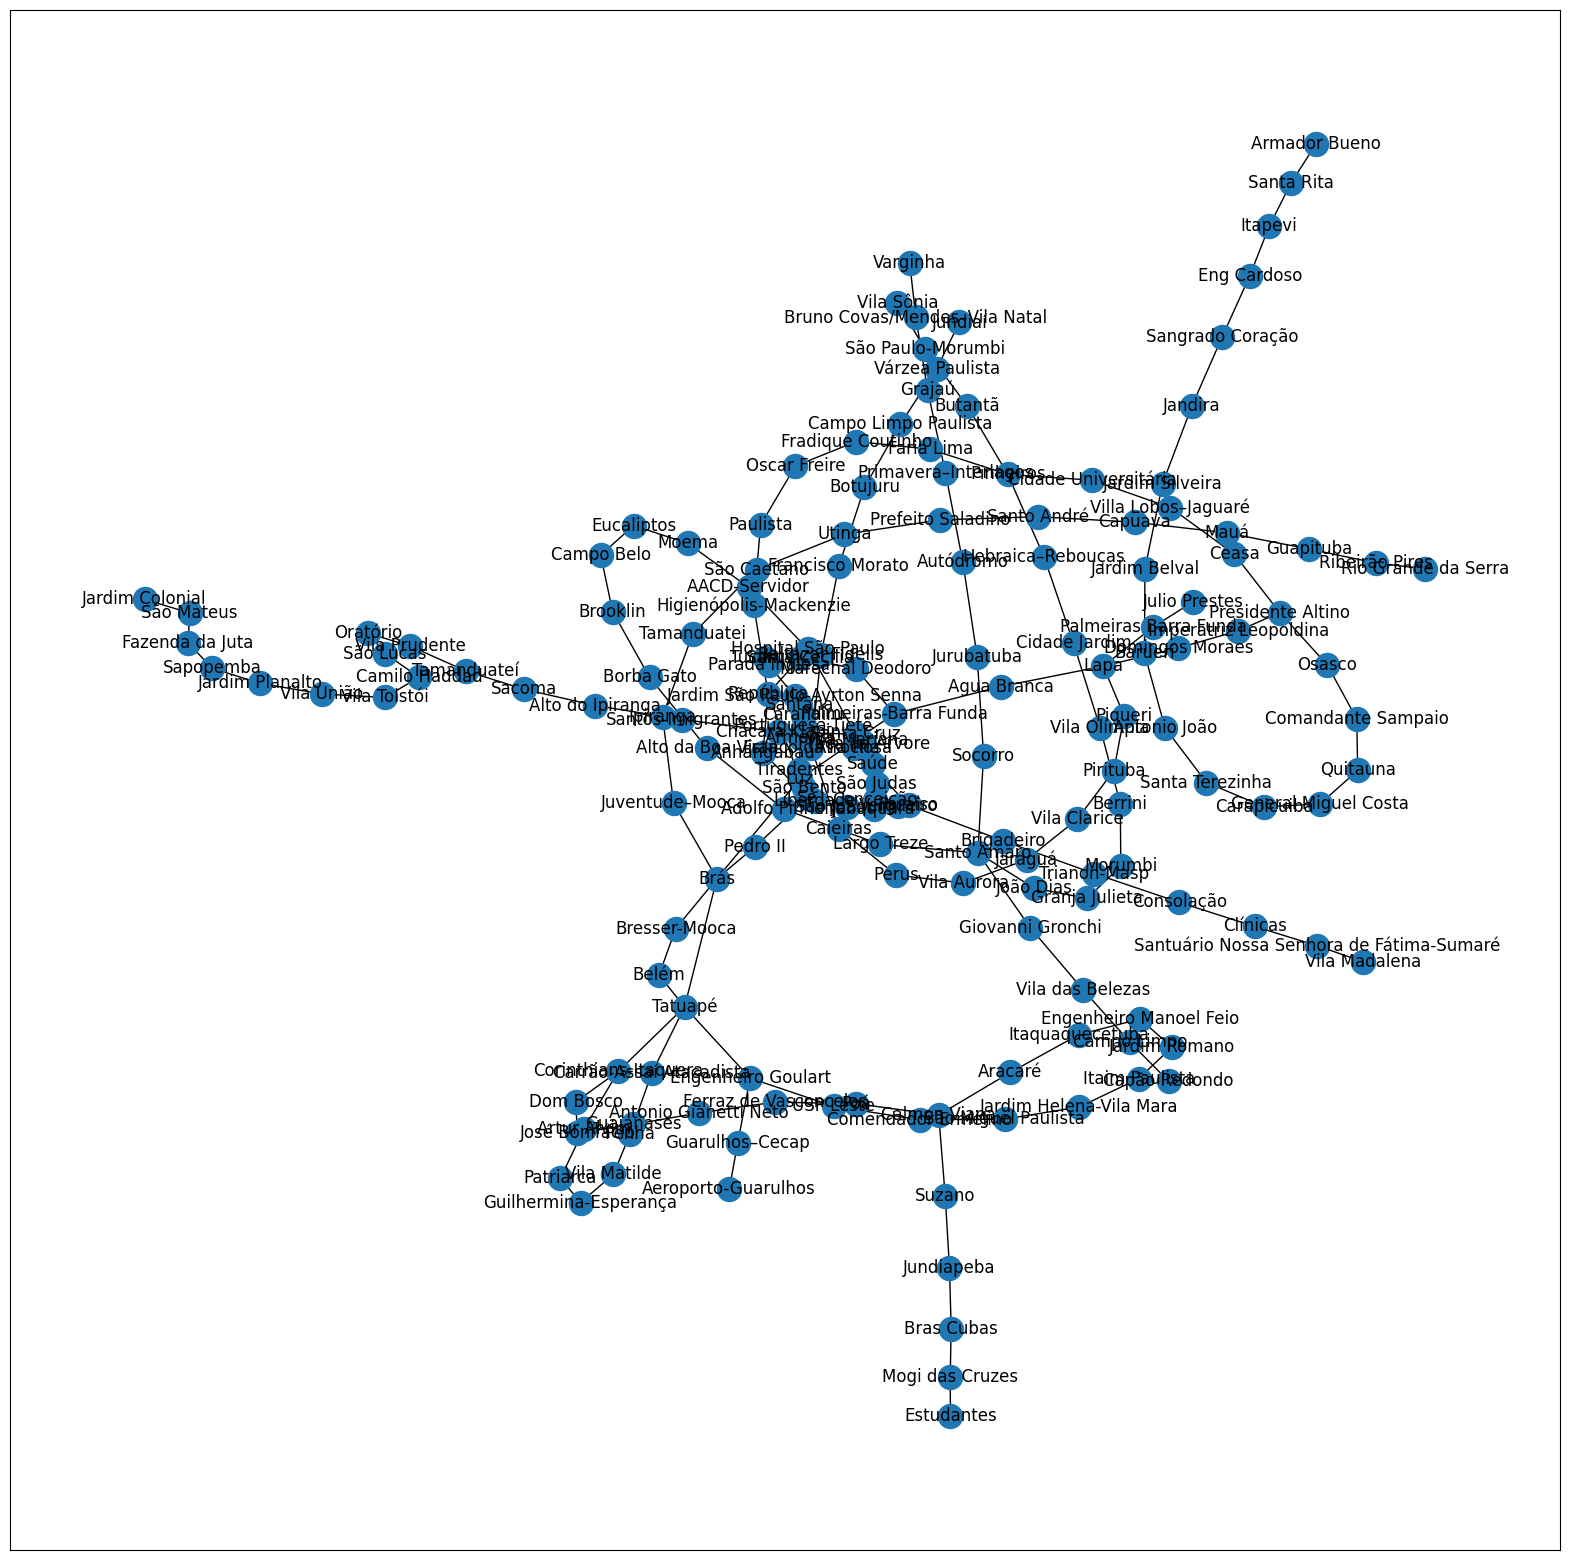

In [54]:
figure(figsize=(20, 20), dpi=100)
nx.draw_networkx(G,with_labels="True")

**Imagem do grafo gerada com Gephi**

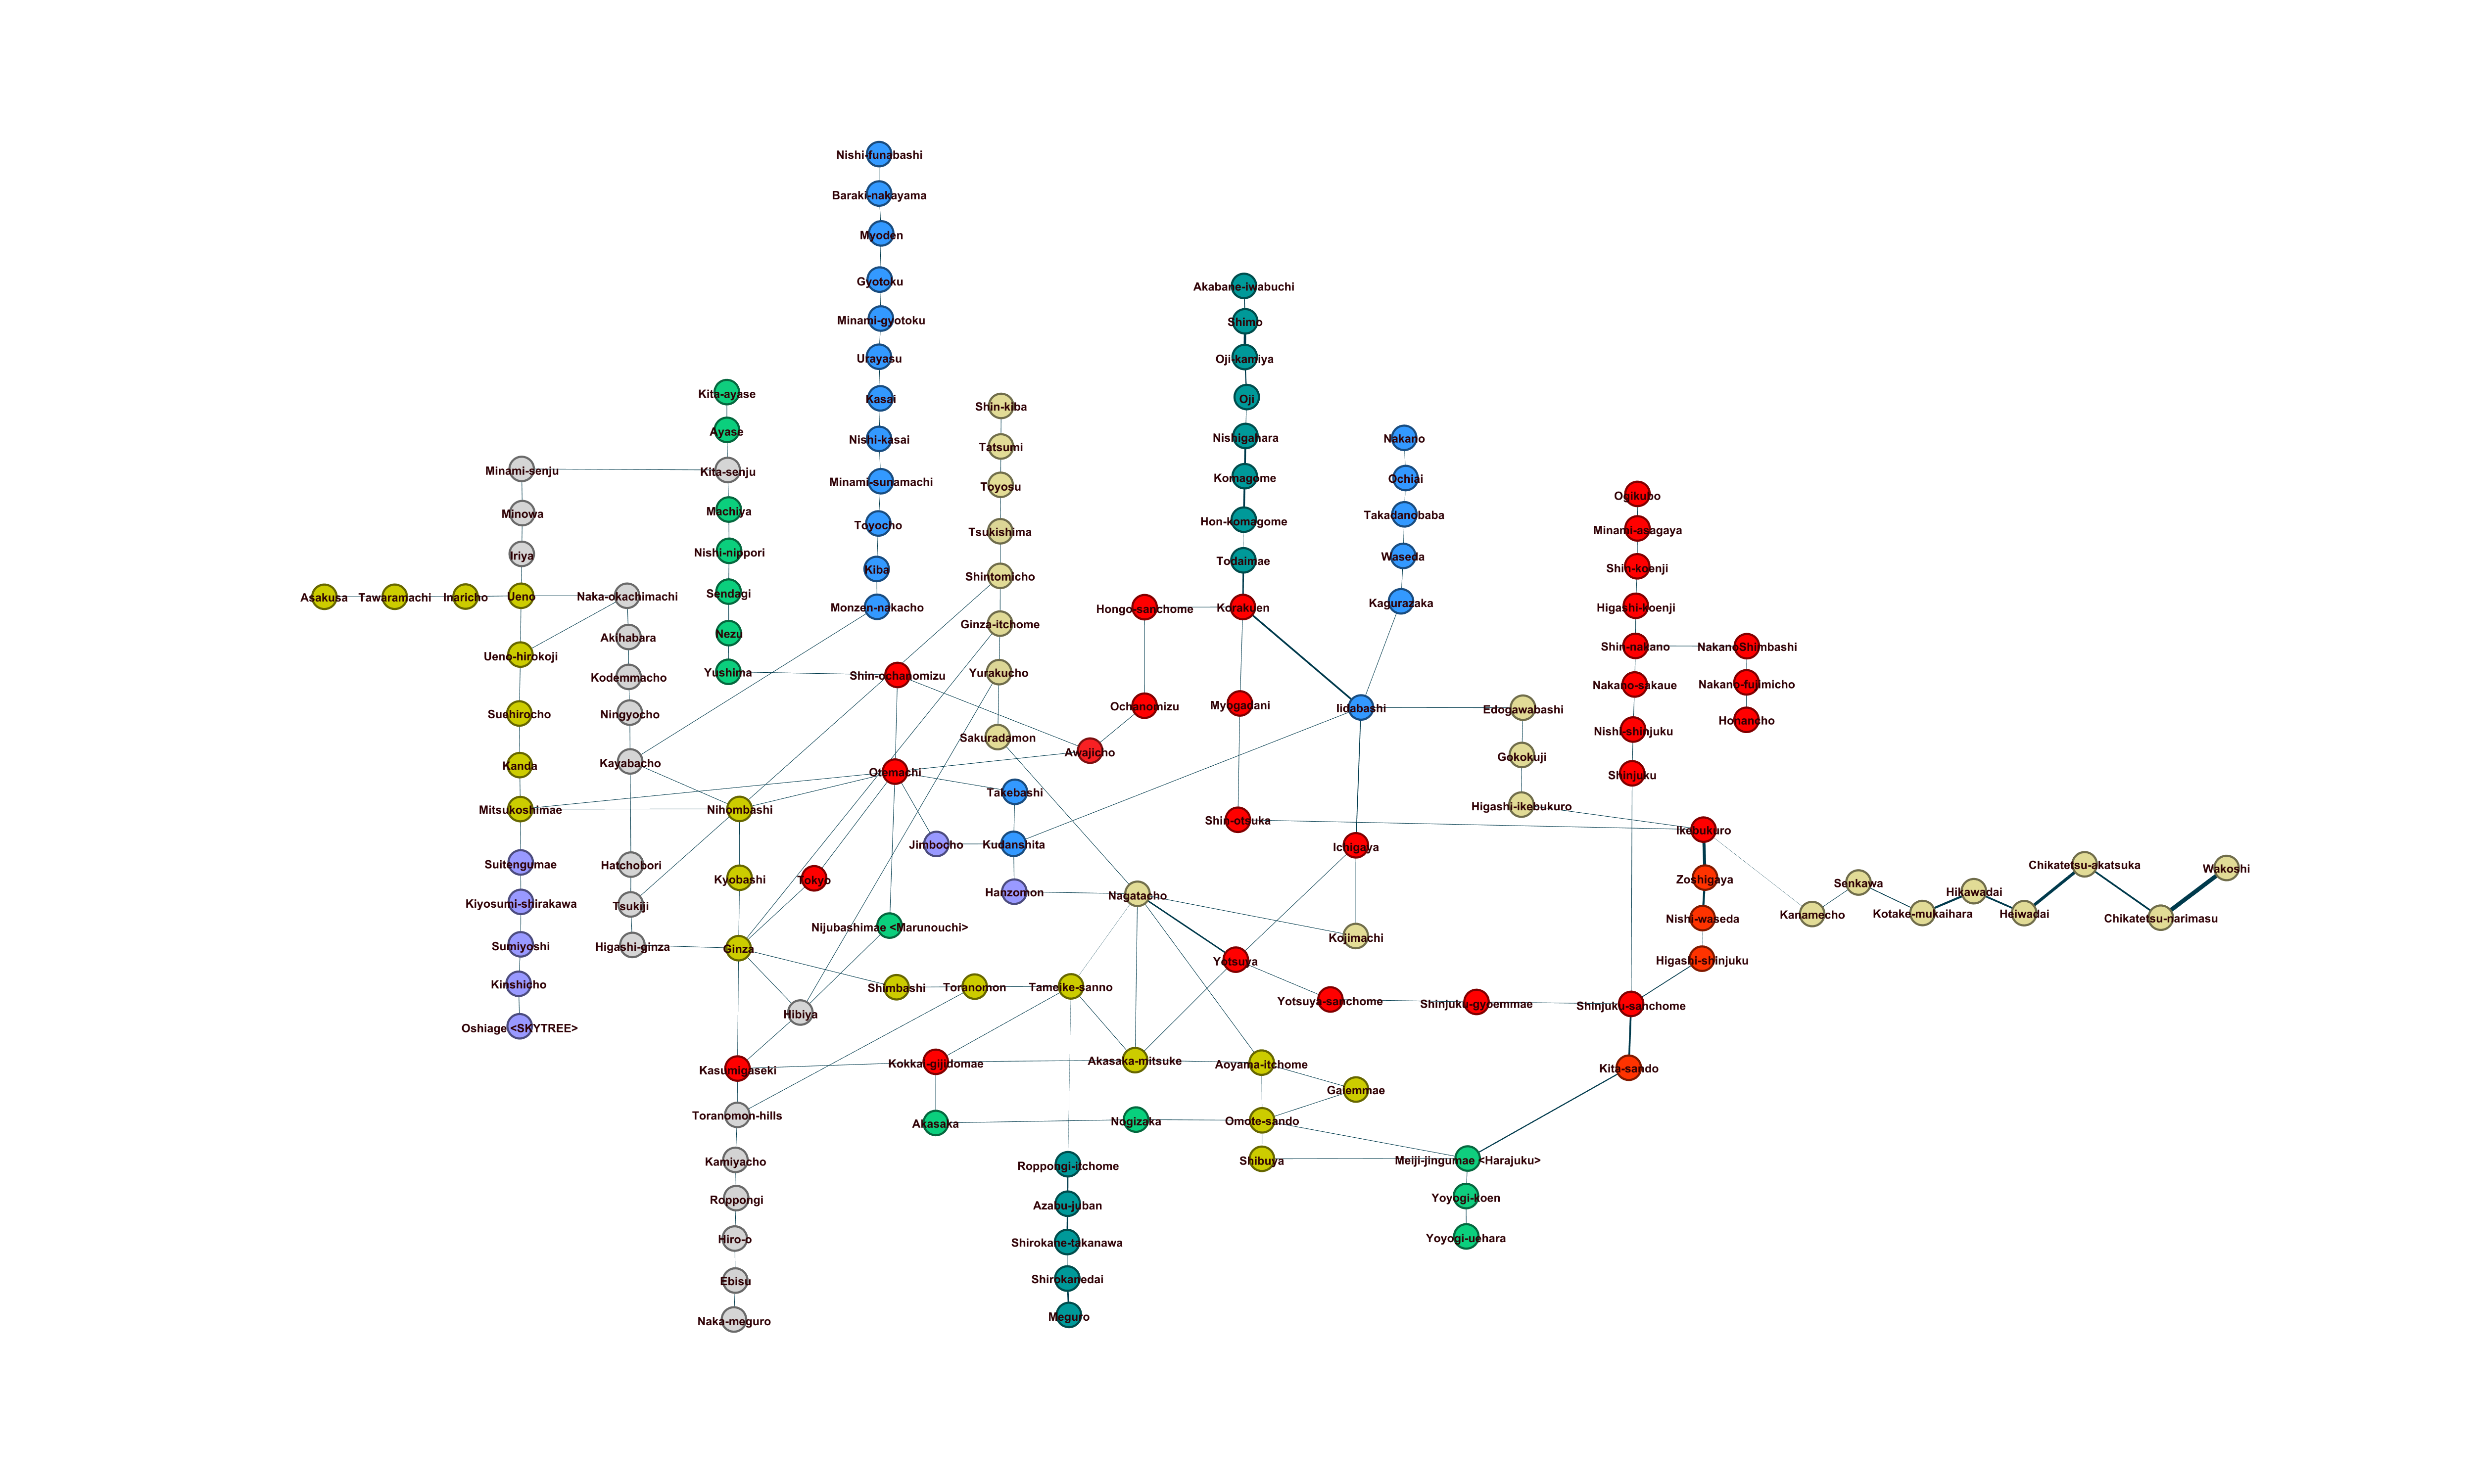

## **Análise do grafo**

## Análise das propriedades basicas do grafo.

Nesta seção iremos analisar algumas propriedades básicas do grafo como a ordem, o tamanho, o diâmetro, a conectividade dos vértices, a conectividade das arestas, a média dos menores caminhos, além de verificar se o grafo é conexo.



In [55]:
# ordem de um grafo- nº de vértices
G.order()

176

In [56]:
# tamanho de um grafo - número de arestas
G.size()

184

In [57]:
G.size(weight="weight")

1165.0

In [58]:
#Verifica se o grafo é conexo ou não.
nx.is_connected(G)

True

In [59]:
#Média dos menores caminhos
nx.average_shortest_path_length(G)

15.761818181818182

In [60]:
#Diâmetro do grafo
nx.diameter(G)

45

In [61]:
# conectividade dos vértices
nx.node_connectivity(G)

1

In [62]:
# conectividade das arestas
nx.edge_connectivity(G)

1

In [63]:
#excentricidade
exc = nx.eccentricity(G)

In [64]:
exc

{'Jabaquara': 36,
 'Conceição': 35,
 'São Judas': 34,
 'Saúde': 33,
 'Praça da Árvore': 32,
 'Santa Cruz': 31,
 'Vila Mariana': 30,
 'Ana Rosa': 29,
 'Paraíso': 28,
 'Vergueiro': 27,
 'São Joaquim': 26,
 'Liberdade': 25,
 'Sé': 24,
 'São Bento': 23,
 'Luz': 23,
 'Tiradentes': 24,
 'Armênia': 25,
 'Portuguesa-Tietê': 26,
 'Carandiru': 27,
 'Santana': 28,
 'Jardim São Paulo-Ayrton Senna': 29,
 'Parada Inglesa': 30,
 'Tucuruvi': 31,
 'Vila Madalena': 34,
 'Santuário Nossa Senhora de Fátima-Sumaré': 33,
 'Clínicas': 32,
 'Consolação': 31,
 'Trianon-Masp': 30,
 'Brigadeiro': 29,
 'Chácara Klabin': 30,
 'Santos-Imigrantes': 31,
 'Alto do Ipiranga': 32,
 'Sacoma': 33,
 'Tamanduateí': 34,
 'Vila Prudente': 35,
 'Palmeiras-Barra Funda': 24,
 'Marechal Deodoro': 25,
 'Santa Cecília': 24,
 'República': 23,
 'Anhangabaú': 24,
 'Pedro II': 24,
 'Brás': 23,
 'Bresser-Mooca': 24,
 'Belém': 25,
 'Tatuapé': 24,
 'Carrão-Assaí Atacadista': 25,
 'Penha': 26,
 'Vila Matilde': 27,
 'Guilhermina-Esperança':

In [65]:
print(max(exc, key=exc.get))

Armador Bueno


## Análise de centralidade de grau

In [66]:
deg_centrality = nx.degree_centrality(G)

print(deg_centrality)

{'Jabaquara': 0.005714285714285714, 'Conceição': 0.011428571428571429, 'São Judas': 0.011428571428571429, 'Saúde': 0.011428571428571429, 'Praça da Árvore': 0.011428571428571429, 'Santa Cruz': 0.022857142857142857, 'Vila Mariana': 0.011428571428571429, 'Ana Rosa': 0.017142857142857144, 'Paraíso': 0.017142857142857144, 'Vergueiro': 0.011428571428571429, 'São Joaquim': 0.011428571428571429, 'Liberdade': 0.011428571428571429, 'Sé': 0.022857142857142857, 'São Bento': 0.011428571428571429, 'Luz': 0.02857142857142857, 'Tiradentes': 0.011428571428571429, 'Armênia': 0.011428571428571429, 'Portuguesa-Tietê': 0.011428571428571429, 'Carandiru': 0.011428571428571429, 'Santana': 0.011428571428571429, 'Jardim São Paulo-Ayrton Senna': 0.011428571428571429, 'Parada Inglesa': 0.011428571428571429, 'Tucuruvi': 0.005714285714285714, 'Vila Madalena': 0.005714285714285714, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.011428571428571429, 'Clínicas': 0.011428571428571429, 'Consolação': 0.011428571428571429, 

In [67]:
centrality_sorted = ((sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de grau [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de grau [relativa]

Luz
0.02857142857142857


In [68]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Luz', 5),
 ('Brás', 5),
 ('Tatuapé', 5),
 ('Santa Cruz', 4),
 ('Sé', 4),
 ('República', 4),
 ('Pinheiros', 4),
 ('Santo Amaro', 4),
 ('Lapa', 4),
 ('Ana Rosa', 3),
 ('Paraíso', 3),
 ('Chácara Klabin', 3),
 ('Palmeiras-Barra Funda', 3),
 ('Corinthians-Itaquera', 3),
 ('Presidente Altino', 3),
 ('Calmon Viana', 3),
 ('Engenheiro Goulart', 3),
 ('Conceição', 2),
 ('São Judas', 2),
 ('Saúde', 2),
 ('Praça da Árvore', 2),
 ('Vila Mariana', 2),
 ('Vergueiro', 2),
 ('São Joaquim', 2),
 ('Liberdade', 2),
 ('São Bento', 2),
 ('Tiradentes', 2),
 ('Armênia', 2),
 ('Portuguesa-Tietê', 2),
 ('Carandiru', 2),
 ('Santana', 2),
 ('Jardim São Paulo-Ayrton Senna', 2),
 ('Parada Inglesa', 2),
 ('Santuário Nossa Senhora de Fátima-Sumaré', 2),
 ('Clínicas', 2),
 ('Consolação', 2),
 ('Trianon-Masp', 2),
 ('Brigadeiro', 2),
 ('Santos-Imigrantes', 2),
 ('Alto do Ipiranga', 2),
 ('Sacoma', 2),
 ('Tamanduateí', 2),
 ('Vila Prudente', 2),
 ('Marechal Deodoro', 2),
 ('Santa Cecília', 2),
 ('Anhangabaú', 2),
 (

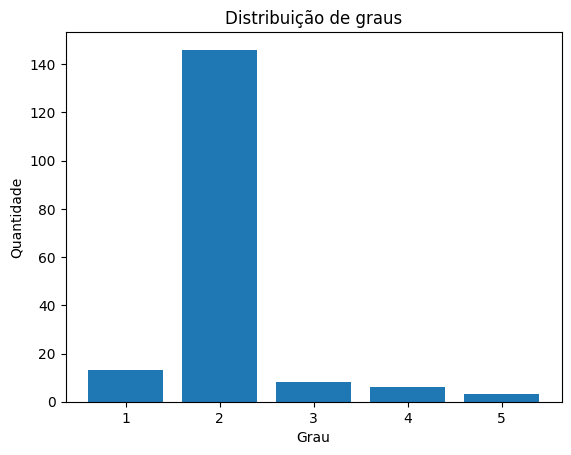

In [69]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Distribuição de graus")
plt.xlabel("Grau")
plt.ylabel("Quantidade")
plt.show()

## Centralidade de Intermediação


In [70]:
bet_centrality = nx.betweenness_centrality(G)

In [71]:
print(max(bet_centrality, key=bet_centrality.get))

Luz


In [72]:
bet_centrality['Brás']

0.42192118226600983

## Resultados

## Centralidade de Proximidade

In [73]:
clo_centrality = nx.closeness_centrality(G)

In [74]:
print(max(clo_centrality , key=clo_centrality.get))

Luz


In [75]:
clo_centrality['Luz']

0.1028202115158637

# Estudo de vunerabilidade

Agora iremos analisar a vunerabilidade do sistema em relação as falhas de uma estação. Para isso, iremos nos basear nas informações de [12] que lista o número de passageiros diários por estação. Primeiramente,  analisaremos características como se o grafo é conexo, diâmetro e média dos menores caminhos para o grafo original. Em seguida, vamos analisar as mesmas métricas quando uma das 10 estações com maior número de passageiros é removida do grafo.

In [76]:
G_temp = G.copy()

Calculamos a média dos menores caminhos do grafo original para termos como referência.

In [77]:
nx.average_shortest_path_length(G)

15.761818181818182

# Análise de expansão da rede

Analisaremos a seguir, o caso na qual fosse construída uma nova conexão entra duas estações. Queremos analisar qual nova aresta entre dois vértices existentes resultaria na melhor melhora de parâmetros como diâmetro do grafo e média dos menores caminhos.

#Referências

1. https://transparencia.metrosp.com.br/dataset/demanda/resource/e69866e9-6c7a-424f-ad4d-816c6b96b1c4
2. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-9-esmeralda
3. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-8-diamante
4. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-5-lilas
5. https://www.viaquatro.com.br/linha-4-amarela/passageiros-transportados
